In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#读入训练数据，根据你的文件存储路径做出相应的修改
train = np.loadtxt('/Users/xiaokeai/Desktop/click.csv',delimiter=',',skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

In [3]:
#标准化
mu=train_x.mean()
sigma=train_x.std()
def standardize(x):
    return (x-mu)/sigma

train_z=standardize(train_x)

In [4]:
#5.2.8
#初始化参数 多元回归
theta=np.random.rand(3)

In [5]:
#预测函数
def f(x):
    return np.dot(x,theta)

In [6]:
#目标函数
def E(x,y):
    return 0.5*np.sum(y-f(x)**2)

In [7]:
#创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]),x,x**2]).T

In [8]:
X=to_matrix(train_z)

In [10]:
#学习率
ETA=1e-3
#误差的差值
diff=1

#重复学习
error=E(X, train_y)
while diff>1e-2:
    #更新参数
    theta=theta-ETA*np.dot(f(X)-train_y, X)
    #计算与上一次误差的差值
    current_error=E(X, train_y)
    diff=error-current_error
    error=current_error

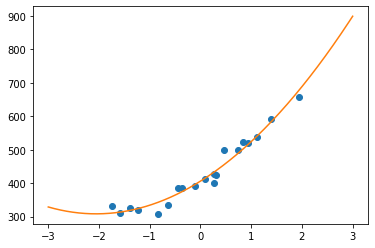

In [11]:
x=np.linspace(-3,3,400)

plt.plot(train_z,train_y,'o')
plt.plot(x,f(to_matrix(x)))
plt.show()

In [13]:
#梯度下降法示意图：均方误差在减小
#均方误差
def MSE(x,y):
    return(1/x.shape[0])*np.sum((y-f(x))**2)

In [14]:
#用随机值初始化参数
theta=np.random.rand(3)

In [15]:
#均方误差的历史记录
errors=[]

In [16]:
#误差的差值
diff=1

In [17]:
#重复学习
errors.append(MSE(X,train_y))
while diff>1e-2:
    theta=theta-ETA*np.dot(f(X)-train_y,X)
    errors.append(MSE(X,train_y))
    diff=errors[-2]-errors[-1]

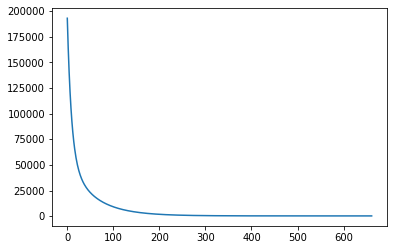

In [18]:
#绘制误差变化图
x=np.arange(len(errors))
plt.plot(x,errors)
plt.show()